### Zomato Data Analysis

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [27]:
# Create the dataframe
df = pd.read_csv("Zomato details.csv",encoding="latin1")

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Convert the data type of "Rate" column

In [41]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)

In [42]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [31]:
df.shape

(148, 7)

### Type of restaurtant

Text(0.5, 0, 'type of resturant')

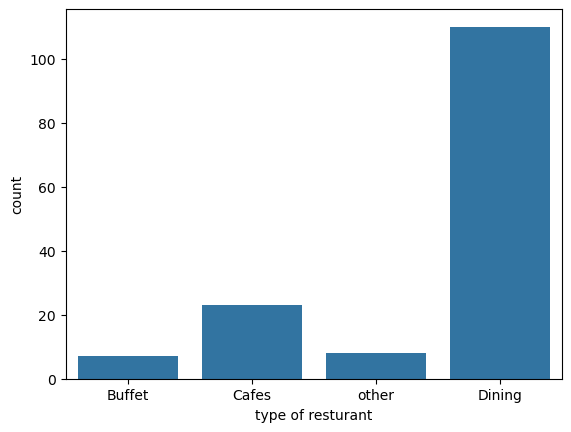

In [10]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")

### Conclusion - Majority of the restaurant falls in dinning category

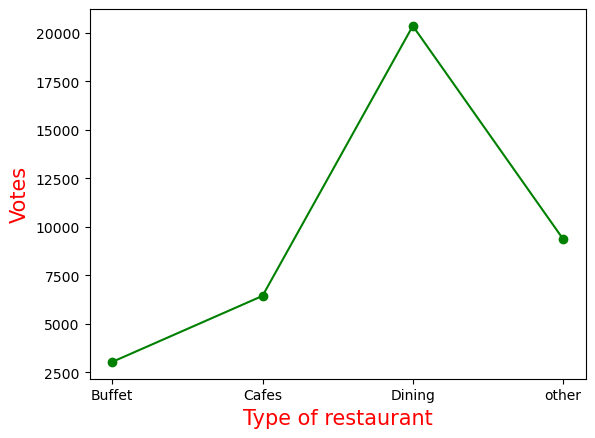

In [32]:
# Grouping the dataset by restaurant type ('listed_in(type)') and calculating the total votes for each type.
# Then, creating a DataFrame 'result' to store these total votes.
# Finally, plotting the total votes for each restaurant type to visualize which types are most popular.


grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=15)
plt.ylabel("Votes", c="red", size=15)
plt.show()

### Conclusion- Dinning restuarnts has recieved maximum votes

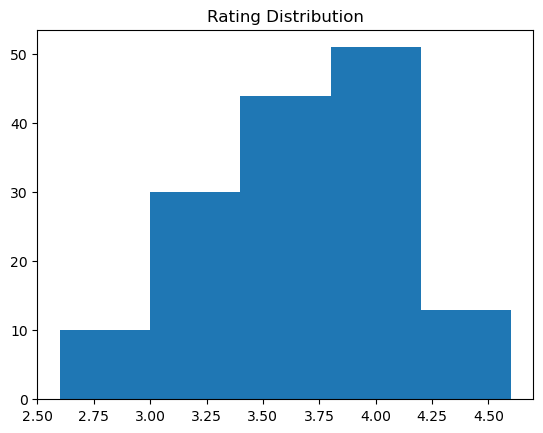

In [35]:
# Plotting a histogram of the 'rate' column to visualize the distribution of restaurant ratings.
# 'bins=5' divides the ratings into 5 intervals to see how ratings are spread.
# Helps in understanding which rating ranges are most common.

plt.hist(df['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

### conclusion- The majority resturants received ratings from 3.5 to 4

### Average order spending by couples

In [36]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

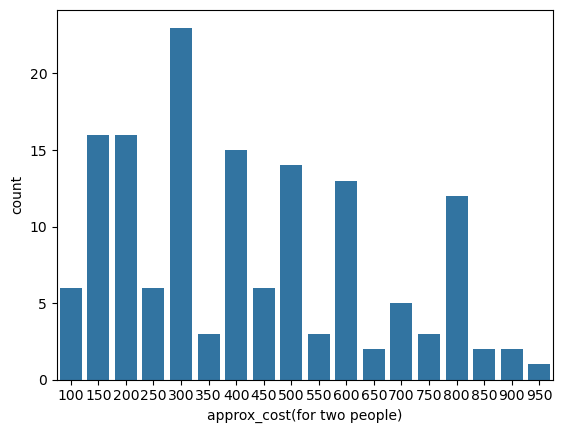

In [37]:
# Using Seaborn's countplot to visualize the distribution of 'approx_cost(for two people)'.
# Shows how many restaurants fall into each cost category for two people.
# Helps understand the pricing patterns of restaurants in the dataset.

couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conclusion-  The majority of couples prefer restuarnts with an approximate cost of 300 rupees

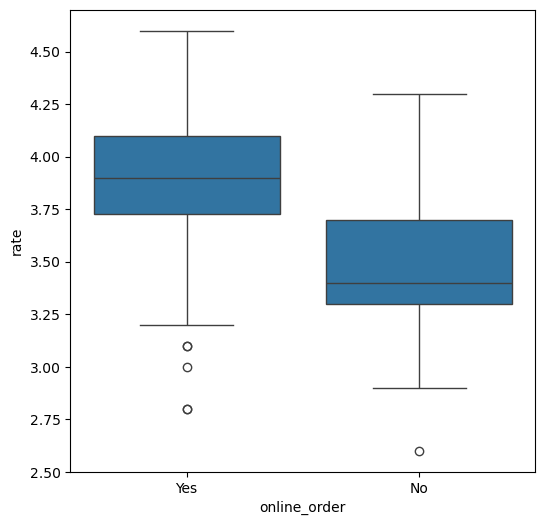

In [44]:
# Which mode receives maximum rating
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.show()

### Conclusion- Offline order received lower rating in comparison to online order

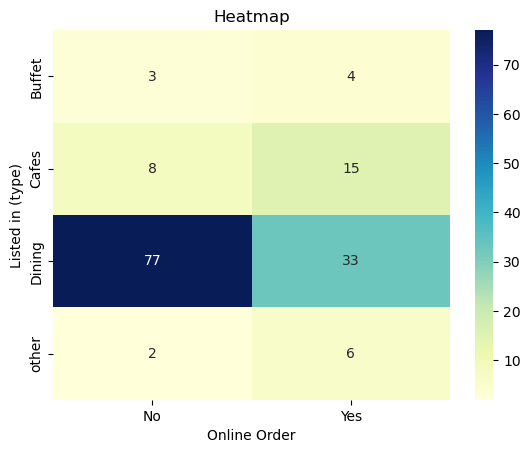

In [47]:
# Creating a pivot table to show the count of restaurants for each type ('listed_in(type)') 
# split by whether they offer online ordering ('online_order').
# Using Seaborn's heatmap to visualize this relationship.
# 'annot=True' shows the actual counts on the heatmap, and 'cmap="YlGnBu"' adds a color gradient.
# Helps identify which types of restaurants are more likely to offer online ordering.


pivot_table= df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (type)")
plt.show()

### Conlusion- Dinning resturants primarily accept offline, whereas cafes primarily receive online orders. This suggests that clients prefer to place order in person at restaurants, but prefer online ordering at cafes.